# Week 1

## Exercise 1

In [1]:
def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))


if ('sc' in locals() or 'sc' in globals()):
    printmd('<<<<<!!!!! It seems that you are running in a IBM Watson Studio Apache Spark Notebook. Please run it in an IBM Watson Studio Default Runtime (without Apache Spark) !!!!!>>>>>')

In [3]:
!pip install pyspark==2.4.5

     |████████████████████████████████| 217.8MB 128kB/s  eta 0:00:01     |██                              | 13.8MB 8.2MB/s eta 0:00:26    | 120.9MB 9.9MB/s eta 0:00:10�█████████▎          | 145.2MB 9.9MB/s eta 0:00:08     |███████████████████████         | 156.8MB 9.9MB/s eta 0:00:072MB 9.9MB/s eta 0:00:06██████▋       | 167.3MB 9.9MB/s eta 0:00:06��█████████████████▉      | 175.5MB 9.9MB/s eta 0:00:05   | 189.1MB 9.9MB/s eta 0:00:03��████████████████████▋  | 201.5MB 9.9MB/s eta 0:00:02��████████████████████▉  | 203.2MB 9.9MB/s eta 0:00:02
     |████████████████████████████████| 204kB 40.5MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [4]:

try:
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession
except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

In [5]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

In [8]:
rdd = sc.parallelize(range(100))

In [12]:
# please replace $$ with the correct characters
rdd.count()

100

In [13]:
rdd.sum()

4950

## Exercise 2

In [14]:
def gt50(i):
    if i > 50:
        return True
    else:
        return False

In [15]:
print(gt50(4))
print(gt50(51))

False
True


Let’s simplify this function

In [16]:
def gt50(i):
    return i > 50

In [17]:
print(gt50(4))
print(gt50(51))

False
True


Now let’s use the lambda notation to define the function.

In [18]:
gt50 = lambda i: i > 50

In [19]:
print(gt50(4))
print(gt50(51))

False
True


In [20]:
from random import shuffle
l = list(range(100))
shuffle(l)
rdd = sc.parallelize(l)

Let’s filter values from our list which are equals or less than 50 by applying our “gt50” function to the list using the “filter” function. Note that by calling the “collect” function, all elements are returned to the Apache Spark Driver. This is not a good idea for BigData, please use “.sample(10,0.1).collect()” or “take(n)” instead.

In [22]:
rdd.filter(gt50).collect()

[59,
 98,
 62,
 77,
 55,
 76,
 85,
 57,
 81,
 74,
 82,
 51,
 68,
 61,
 80,
 92,
 53,
 97,
 94,
 91,
 71,
 90,
 88,
 89,
 87,
 67,
 99,
 84,
 70,
 52,
 66,
 75,
 69,
 56,
 60,
 83,
 65,
 79,
 72,
 58,
 86,
 78,
 73,
 96,
 95,
 64,
 54,
 63,
 93]

We can also use the lambda function directly.

In [23]:
rdd.filter(lambda i: i > 50).collect()

[59,
 98,
 62,
 77,
 55,
 76,
 85,
 57,
 81,
 74,
 82,
 51,
 68,
 61,
 80,
 92,
 53,
 97,
 94,
 91,
 71,
 90,
 88,
 89,
 87,
 67,
 99,
 84,
 70,
 52,
 66,
 75,
 69,
 56,
 60,
 83,
 65,
 79,
 72,
 58,
 86,
 78,
 73,
 96,
 95,
 64,
 54,
 63,
 93]

In [25]:
rdd.filter(lambda x: x > 50).filter(lambda x: x < 75).sum()

1500

## Exercise 3

In [27]:
from pyspark.sql import Row


df = spark.createDataFrame([Row(id=1, value='value1'),Row(id=2, value='value2')])

# let's have a look what's inside
df.show()

# let's print the schema
df.printSchema()

+---+------+
| id| value|
+---+------+
|  1|value1|
|  2|value2|
+---+------+

root
 |-- id: long (nullable = true)
 |-- value: string (nullable = true)



Now we register this DataFrame as query table and issue an SQL statement against it. Please note that the result of the SQL execution returns a new DataFrame we can work with.

In [28]:
# register dataframe as query table
df.createOrReplaceTempView('df_view')

# execute SQL query
df_result = spark.sql('select value from df_view where id=2')

# examine contents of result
df_result.show()

# get result as string
df_result.first().value

+------+
| value|
+------+
|value2|
+------+



'value2'


Although we’ll learn more about DataFrames next week, please try to find a way to count the rows in this DataFrame by looking at the API documentation. No worries, we’ll cover DataFrames in more detail next week.

In [29]:
df.count()

2

# Week 2

## Exercise 1

In [30]:
# delete files from previous runs
!rm -f hmp.parquet*

# download the file containing the data in PARQUET format
!wget https://github.com/IBM/coursera/raw/master/hmp.parquet
    
# create a dataframe out of it
df = spark.read.parquet('hmp.parquet')

# register a corresponding query table
df.createOrReplaceTempView('df')

--2020-07-07 18:49:36--  https://github.com/IBM/coursera/raw/master/hmp.parquet
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/skillsnetwork/raw/master/hmp.parquet [following]
--2020-07-07 18:49:36--  https://github.com/IBM/skillsnetwork/raw/master/hmp.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/skillsnetwork/master/hmp.parquet [following]
--2020-07-07 18:49:37--  https://raw.githubusercontent.com/IBM/skillsnetwork/master/hmp.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 932997 (911K) [application/octet-stream]
Saving 

Let’s have a look at the data set first. This dataset contains sensor recordings from different movement activities as we will see in the next week’s lectures. X, Y and Z contain accelerometer sensor values whereas the class field contains information about which movement has been recorded. The source field is optional and can be used for data lineage since it contains the file name of the original file where the particular row was imported from.

In [31]:
df.show()
df.printSchema()

+---+---+---+--------------------+-----------+
|  x|  y|  z|              source|      class|
+---+---+---+--------------------+-----------+
| 22| 49| 35|Accelerometer-201...|Brush_teeth|
| 22| 49| 35|Accelerometer-201...|Brush_teeth|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|
| 21| 52| 34|Accelerometer-201...|Brush_teeth|
| 22| 51| 34|Accelerometer-201...|Brush_teeth|
| 20| 50| 35|Accelerometer-201...|Brush_teeth|
| 22| 52| 34|Accelerometer-201...|Brush_teeth|
| 22| 50| 34|Accelerometer-201...|Brush_teeth|
| 22| 51| 35|Accelerometer-201...|Brush_teeth|
| 21| 51| 33|Accelerometer-201...|Brush_teeth|
| 20| 50| 34|Accelerometer-201...|Brush_teeth|
| 21| 49| 33|Accelerometer-201...|Brush_teeth|
| 21| 49| 33|Accelerometer-201...|Brush_teeth|
| 20| 51| 35|Accelerometer-201...|Brush_teeth|
| 18| 49| 34|Accelerometer-201...|Brush_teeth|
| 19| 48| 34|Accelerometer-201...|Brush_teeth|
| 16| 53| 34|Accelerometer-201...|Brush_teeth|
| 18| 52| 35|

This is a classical classification data set. One thing we always do during data analysis is checking if the classes are balanced. In other words, if there are more or less the same number of example in each class. Let’s find out by a simple aggregation using SQL.

In [32]:
spark.sql('select class,count(*) from df group by class').show()

+--------------+--------+
|         class|count(1)|
+--------------+--------+
| Use_telephone|   15225|
| Standup_chair|   25417|
|      Eat_meat|   31236|
|     Getup_bed|   45801|
|   Drink_glass|   42792|
|    Pour_water|   41673|
|     Comb_hair|   23504|
|          Walk|   92254|
|  Climb_stairs|   40258|
| Sitdown_chair|   25036|
|   Liedown_bed|   11446|
|Descend_stairs|   15375|
|   Brush_teeth|   29829|
|      Eat_soup|    6683|
+--------------+--------+



As you can see there is quite an imbalance between classes. Before we dig into this, let’s re-write the same query using the DataFrame API – just in case you are not familiar with SQL. As we’ve learned before, it doesn’t matter if you express your queries with SQL or the DataFrame API – it all gets boiled down into the same execution plan optimized by Tungsten and accelerated by Catalyst. You can even mix and match SQL and DataFrame API code if you like.

In [33]:
df.groupBy('class').count().show()

+--------------+-----+
|         class|count|
+--------------+-----+
| Use_telephone|15225|
| Standup_chair|25417|
|      Eat_meat|31236|
|     Getup_bed|45801|
|   Drink_glass|42792|
|    Pour_water|41673|
|     Comb_hair|23504|
|          Walk|92254|
|  Climb_stairs|40258|
| Sitdown_chair|25036|
|   Liedown_bed|11446|
|Descend_stairs|15375|
|   Brush_teeth|29829|
|      Eat_soup| 6683|
+--------------+-----+



Let’s create a bar plot from this data. We’re using the pixidust library, which is Open Source, because of its simplicity. But any other library like matplotlib is fine as well.

In [34]:
import pixiedust
from pyspark.sql.functions import col
counts = df.groupBy('class').count().orderBy('count')
display(counts)

class,count
Eat_soup,6683
Liedown_bed,11446
Use_telephone,15225
Descend_stairs,15375
Comb_hair,23504
Sitdown_chair,25036
Standup_chair,25417
Brush_teeth,29829
Eat_meat,31236
Climb_stairs,40258


This looks nice, but it would be nice if we can aggregate further to obtain some quantitative metrics on the imbalance like, min, max, mean and standard deviation. If we divide max by min we get a measure called minmax ration which tells us something about the relationship between the smallest and largest class. Again, let’s first use SQL for those of you familiar with SQL. Don’t be scared, we’re used nested sub-selects, basically selecting from a result of a SQL query like it was a table. All within on SQL statement.

In [35]:
spark.sql('''
    select 
        *,
        max/min as minmaxratio -- compute minmaxratio based on previously computed values
        from (
            select 
                min(ct) as min, -- compute minimum value of all classes
                max(ct) as max, -- compute maximum value of all classes
                mean(ct) as mean, -- compute mean between all classes
                stddev(ct) as stddev -- compute standard deviation between all classes
                from (
                    select
                        count(*) as ct -- count the number of rows per class and rename it to ct
                        from df -- access the temporary query table called df backed by DataFrame df
                        group by class -- aggrecate over class
                )
        )   
''').show()

+----+-----+------------------+------------------+-----------------+
| min|  max|              mean|            stddev|      minmaxratio|
+----+-----+------------------+------------------+-----------------+
|6683|92254|31894.928571428572|21284.893716741157|13.80427951518779|
+----+-----+------------------+------------------+-----------------+



The same query can be expressed using the DataFrame API. Again, don’t be scared. It’s just a sequential expression of transformation steps. You now an choose which syntax you like better.

In [36]:
from pyspark.sql.functions import col, min, max, mean, stddev

df \
    .groupBy('class') \
    .count() \
    .select([ 
        min(col("count")).alias('min'), 
        max(col("count")).alias('max'), 
        mean(col("count")).alias('mean'), 
        stddev(col("count")).alias('stddev') 
    ]) \
    .select([
        col('*'),
        (col("max") / col("min")).alias('minmaxratio')
    ]) \
    .show()

+----+-----+------------------+------------------+-----------------+
| min|  max|              mean|            stddev|      minmaxratio|
+----+-----+------------------+------------------+-----------------+
|6683|92254|31894.928571428572|21284.893716741157|13.80427951518779|
+----+-----+------------------+------------------+-----------------+



Now it’s time for you to work on the data set. First, please create a table of all classes with the respective counts, but this time, please order the table by the count number, ascending.

In [ ]:
$$$ your code goes here


Pixiedust is a very sophisticated library. It takes care of sorting as well. Please modify the bar chart so that it gets sorted by the number of elements per class, ascending. Hint: It’s an option available in the UI once rendered using the display() function.

In [ ]:
$$$ your code goes here


Imbalanced classes can cause pain in machine learning. Therefore let’s rebalance. In the flowing we limit the number of elements per class to the amount of the least represented class. This is called undersampling. Other ways of rebalancing can be found here:

In [37]:
from pyspark.sql.functions import min

# create a lot of distinct classes from the dataset
classes = [row[0] for row in df.select('class').distinct().collect()]

# compute the number of elements of the smallest class in order to limit the number of samples per calss
min = df.groupBy('class').count().select(min('count')).first()[0]

# define the result dataframe variable
df_balanced = None

# iterate over distinct classes
for cls in classes:
    
    # only select examples for the specific class within this iteration
    # shuffle the order of the elements (by setting fraction to 1.0 sample works like shuffle)
    # return only the first n samples
    df_temp = df \
        .filter("class = '"+cls+"'") \
        .sample(False, 1.0) \
        .limit(min)
    
    # on first iteration, assing df_temp to empty df_balanced
    if df_balanced == None:    
        df_balanced = df_temp
    # afterwards, append vertically
    else:
        df_balanced=df_balanced.union(df_temp)

Please verify, by using the code cell below, if df_balanced has the same number of elements per class. You should get 6683 elements per class.

In [57]:
df_balanced.groupBy('class').count().select(max('count')).first()[0]

6683

## Exercise 2

In [61]:
!wget https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
!mv washing.parquet?raw=true washing.parquet

--2020-07-07 19:27:38--  https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true [following]
--2020-07-07 19:27:38--  https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet [following]
--2020-07-07 19:27:38--  https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/skillsnetwork/master/coursera_ds/washing.parquet [fo

In [62]:
df = spark.read.parquet('washing.parquet')

So let's check how may rows we have got

In [64]:
df.count()

2058

Now we register the data frame in the ApacheSparkSQL catalog so that we can query it using SQL

In [66]:
df.createOrReplaceTempView("washing")
spark.sql("SELECT * FROM washing").show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

So let's visualize voltage using a box plot to get an idea on the value distribution of this parameter. First, we have to create a python list. Make sure you use the sample function in order to not blast your spark driver or plotting library.

In [67]:
result = spark.sql("select voltage from washing where voltage is not null")
result_array = result.rdd.map(lambda row : row.voltage).sample(False,0.1).collect()

#just print the 1st 15 elements
result_array[:15]

[244, 235, 235, 230, 223, 221, 229, 227, 228, 237, 228, 234, 224, 228, 231]

Now we have to activate the notebook to show the plots directly under the cell

In [68]:
%matplotlib inline

Now it's time to plot the python list by importing the matplotlib library, calling "boxplot" and "show". Note that you can see mean (red line) around 230. Then you see that 50% of all values are between 225 and 235 (blue box). Per default values up to 250 are not seen as outliers (little, black horizontal line). And the "plus" symbols on top are definitely outliers. Congratulations, you've written your first anomaly detection algorithm. Unfurtunately you still need a brain attached to it, so we'll cover on how we write one without a brain needed in the next course. And in the course after that we'll even tell you how to implement a artificial brain to further improve it, so stay tuned :)

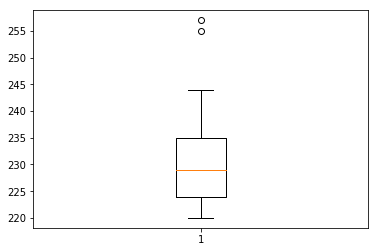

In [69]:
import matplotlib.pyplot as plt
plt.boxplot(result_array)
plt.show()

Since we are dealing with time series data we want to make use of the time dimension as well. The least complex plots are run charts where the time domain (dimension) is represented at the horizontal x-axis and the y-axis shows the actual sensor value. Let's do this for voltage as well.

In [70]:
result = spark.sql("select voltage,ts from washing where voltage is not null order by ts asc")
result_rdd = result.rdd.sample(False,0.1).map(lambda row : (row.ts,row.voltage))
result_array_ts = result_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()
result_array_voltage = result_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()
print(result_array_ts[:15])
print(result_array_voltage[:15])

[1547808728916, 1547808752930, 1547808803962, 1547808818973, 1547808821976, 1547808824978, 1547808827980, 1547808885074, 1547808912091, 1547808954133, 1547809014196, 1547809026203, 1547809071226, 1547809080236, 1547809119261]
[222, 227, 237, 237, 230, 237, 224, 226, 236, 236, 255, 221, 231, 235, 223]


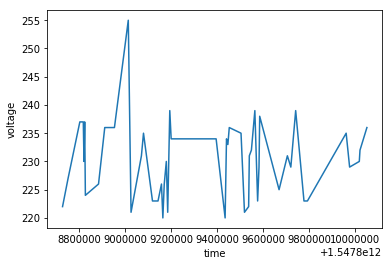

In [71]:
plt.plot(result_array_ts,result_array_voltage)
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()

But this time we want to only plot data worth of one hour. Therefore we first have to find out in which date range we have data available:

In [72]:
spark.sql("select min(ts),max(ts) from washing").show()

+-------------+-------------+
|      min(ts)|      max(ts)|
+-------------+-------------+
|1547808720911|1547810064867|
+-------------+-------------+



Now lets repeat the previous steps but only show data for hour. We've found out the low and high boundary of data available and we know that "ts" stand for "timestamp". Timestamp are the number of millisecons passed since the 1st of Jan. 1970. You can also use an online tool like http://www.epochconverter.com/ to convert these. But for now just an interval of 60 minutes (10006060)=3600000 within the range above (note that we have removed the sample function because the data set is already reduced)

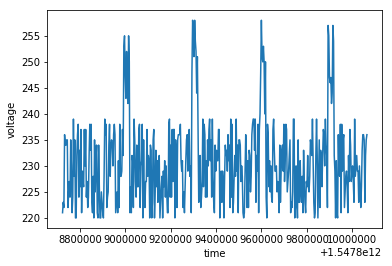

In [73]:
result = spark.sql(
"""
select voltage,ts from washing 
    where voltage is not null and 
    ts > 1547808720911 and
    ts <= 1547810064867+3600000
    order by ts asc
""")
result_rdd = result.rdd.map(lambda row : (row.ts,row.voltage))
result_array_ts = result_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()
result_array_voltage = result_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()
plt.plot(result_array_ts,result_array_voltage)
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()

As you can see we are not only able to spot the outliers but also see a time pattern of these outliers occuring which can be used for further downstream analysis. Again your brain was already capable of spotting the pattern. In the next two coursera courses we will teach a machine to spot those patterns as well.

Now we've plotted a maximum of two dimensions at a time, let's go for three in a so-called 3D scatter plot. Again we have to create python lists (with applied sampling if necessary) from three properties of our data.

In [74]:
result_df = spark.sql("""
select hardness,temperature,flowrate from washing
    where hardness is not null and 
    temperature is not null and 
    flowrate is not null
""")
result_rdd = result_df.rdd.sample(False,0.1).map(lambda row : (row.hardness,row.temperature,row.flowrate))
result_array_hardness = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[0]).collect()
result_array_temperature = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[1]).collect()
result_array_flowrate = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[2]).collect()

Once done it is very simple to import the necessary library and create a scatter plot

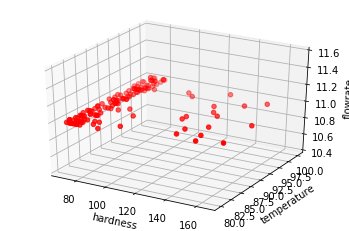

In [75]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(result_array_hardness,result_array_temperature,result_array_flowrate, c='r', marker='o')

ax.set_xlabel('hardness')
ax.set_ylabel('temperature')
ax.set_zlabel('flowrate')

plt.show()

You will notice that the individual points resemble in some sort of plane. But this is not a surprise. Actually we can draw the following conclusions from the plot:

most of the data points are lying around hardness 60-80, temperature 80-100 and flowrate 80-100
there are some outliers, especially when it comes to the range of hardness 100-200
the data follows some narrow boundaries
So lets double-check what's going on with hardness since it seems that it really sticks around 60-80 and very seldom creates values above that. We can use a histogram for that which bins together certain value ranges and counts the frequency of occurences of values within this range. Those frequencies are ordered and shown as a bar diagram, so let's plot it:

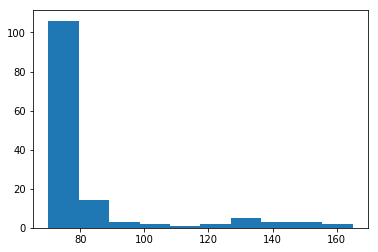

In [76]:
plt.hist(result_array_hardness)
plt.show()

Our assumpion was correct, nearly all values are around 60-80 with very less values about that threshold. This concludes Exercice 3.1.

## Exercise 3

In [78]:
!wget https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
!mv washing.parquet?raw=true washing.parquet

--2020-07-07 19:57:32--  https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true [following]
--2020-07-07 19:57:32--  https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet [following]
--2020-07-07 19:57:32--  https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/skillsnetwork/master/coursera_ds/washing.parquet [fo

In [79]:
df = spark.read.parquet('washing.parquet')
df.createOrReplaceTempView('washing')
df.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

This is the feature transformation part of this exercise. Since our table is mixing schemas from different sensor data sources we are creating new features. In other word we use existing columns to calculate new ones. We only use min and max for now, but using more advanced aggregations as we've learned in week three may improve the results. We are calculating those aggregations over a sliding window "w". This window is defined in the SQL statement and basically reads the table by a one by one stride in direction of increasing timestamp. Whenever a row leaves the window a new one is included. Therefore this window is called sliding window (in contrast to tubling, time or count windows). More on this can be found here: https://flink.apache.org/news/2015/12/04/Introducing-windows.html

In [80]:
result = spark.sql("""
SELECT * from (
    SELECT
    min(temperature) over w as min_temperature,
    max(temperature) over w as max_temperature, 
    min(voltage) over w as min_voltage,
    max(voltage) over w as max_voltage,
    min(flowrate) over w as min_flowrate,
    max(flowrate) over w as max_flowrate,
    min(frequency) over w as min_frequency,
    max(frequency) over w as max_frequency,
    min(hardness) over w as min_hardness,
    max(hardness) over w as max_hardness,
    min(speed) over w as min_speed,
    max(speed) over w as max_speed
    FROM washing 
    WINDOW w AS (ORDER BY ts ROWS BETWEEN CURRENT ROW AND 10 FOLLOWING) 
)
WHERE min_temperature is not null 
AND max_temperature is not null
AND min_voltage is not null
AND max_voltage is not null
AND min_flowrate is not null
AND max_flowrate is not null
AND min_frequency is not null
AND max_frequency is not null
AND min_hardness is not null
AND min_speed is not null
AND max_speed is not null   
""")

Since this table contains null values also our window might contain them. In case for a certain feature all values in that window are null we obtain also null. As we can see here (in my dataset) this is the case for 9 rows.

In [81]:
df.count()-result.count()

7

Now we import some classes from SparkML. PCA for the actual algorithm. Vectors for the data structure expected by PCA and VectorAssembler to transform data into these vector structures.

In [82]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler


Let's define a vector transformation helper class which takes all our input features (result.columns) and created one additional column called "features" which contains all our input features as one single column wrapped in "DenseVector" objects

In [83]:
assembler = VectorAssembler(inputCols=result.columns, outputCol="features")

Now we actually transform the data, note that this is highly optimized code and runs really fast in contrast if we had implemented it.

In [84]:
features = assembler.transform(result)

Let's have a look at how this new additional column "features" looks like:

In [85]:
features.rdd.map(lambda r : r.features).take(10)

[DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 71.0, 78.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 72.0, 78.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 72.0, 80.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 72.0, 80.0, 1033.0, 1046.0]),
 DenseVector([81.0, 100.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1033.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1033.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 71.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 71.0, 74.0, 73.0, 80.0, 1046.0, 1046.0])]

Since the source data set has been prepared as a list of DenseVectors we can now apply PCA. Note that the first line again only prepares the algorithm by finding the transformation matrices (fit method)

In [86]:
pca = PCA(k=3, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(features)


Now we can actually transform the data. Let's have a look at the first 20 rows

In [87]:
result_pca = model.transform(features).select("pcaFeatures")
result_pca.show(truncate=False)

+-----------------------------------------------------------+
|pcaFeatures                                                |
+-----------------------------------------------------------+
|[1459.9789705814187,-18.745237781780922,70.78430794796873] |
|[1459.995481828676,-19.11343146165273,70.72738871425986]   |
|[1460.0895843561282,-20.969471062922928,70.75630600322052] |
|[1469.6993929419532,-20.403124647615513,62.013569674880955]|
|[1469.7159041892107,-20.771318327487293,61.95665044117209] |
|[1469.7128317338704,-20.790751117222456,61.896106678330966]|
|[1478.3530264572928,-20.294557029728722,71.67550104809607] |
|[1478.3530264572928,-20.294557029728722,71.67550104809607] |
|[1478.3686036138165,-20.260626897636314,71.63355353606426] |
|[1478.3686036138165,-20.260626897636314,71.63355353606426] |
|[1483.5412027684088,-20.006222577501354,66.82710394284209] |
|[1483.5171090223353,-20.867020421583753,66.86707301954084] |
|[1483.4224268542928,-19.87574823665505,66.93027077913985]  |
|[1483.4


So we obtained three completely new columns which we can plot now. Let run a final check if the number of rows is the same.

In [88]:
result_pca.count()

2051


Cool, this works as expected. Now we obtain a sample and read each of the three columns into a python list

In [89]:
rdd = result_pca.rdd.sample(False,0.8)

In [90]:
x = rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[0]).collect()

In [91]:
y = rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[1]).collect()

In [92]:
z = rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[2]).collect()

Finally we plot the three lists and name each of them as dimension 1-3 in the plot

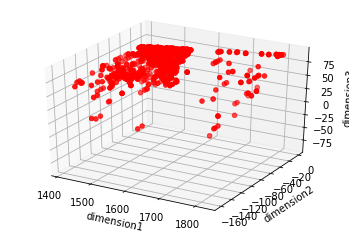

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')




ax.scatter(x,y,z, c='r', marker='o')

ax.set_xlabel('dimension1')
ax.set_ylabel('dimension2')
ax.set_zlabel('dimension3')

plt.show()


Congratulations, we are done! We can see two clusters in the data set. We can also see a third cluster which either can be outliers or a real cluster. In the next course we will actually learn how to compute clusters automatically. For now we know that the data indicates that there are two semi-stable states of the machine and sometime we see some anomalies since those data points don't fit into one of the two clusters.

# Week 3

## Exercise 1

In [6]:
# delete files from previous runs
!rm -f hmp.parquet*

# download the file containing the data in PARQUET format
!wget https://github.com/IBM/coursera/raw/master/hmp.parquet
    
# create a dataframe out of it
df = spark.read.parquet('hmp.parquet')

# register a corresponding query table
df.createOrReplaceTempView('df')

--2020-07-08 16:32:37--  https://github.com/IBM/coursera/raw/master/hmp.parquet
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/skillsnetwork/raw/master/hmp.parquet [following]
--2020-07-08 16:32:37--  https://github.com/IBM/skillsnetwork/raw/master/hmp.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/skillsnetwork/master/hmp.parquet [following]
--2020-07-08 16:32:37--  https://raw.githubusercontent.com/IBM/skillsnetwork/master/hmp.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 932997 (911K) [application/octet-stream]
Savin

Given below is the feature engineering pipeline from the lecture. Please add a feature column called “features_minmax” using the MinMaxScaler.

In [8]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, Normalizer, MinMaxScaler
from pyspark.ml.linalg import Vectors
from pyspark.ml import Pipeline

indexer = StringIndexer(inputCol="class", outputCol="classIndex")
encoder = OneHotEncoder(inputCol="classIndex", outputCol="categoryVec")
vectorAssembler = VectorAssembler(inputCols=["x","y","z"],
                                  outputCol="features")
normalizer = Normalizer(inputCol="features", outputCol="features_norm", p=1.0)

minmaxscaler = MinMaxScaler(inputCol="features_norm", outputCol="features_minmax")

pipeline = Pipeline(stages=[indexer, encoder, vectorAssembler, normalizer,minmaxscaler])
model = pipeline.fit(df)
prediction = model.transform(df)
prediction.show()

+---+---+---+--------------------+-----------+----------+--------------+----------------+--------------------+--------------------+
|  x|  y|  z|              source|      class|classIndex|   categoryVec|        features|       features_norm|     features_minmax|
+---+---+---+--------------------+-----------+----------+--------------+----------------+--------------------+--------------------+
| 22| 49| 35|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,49.0,35.0]|[0.20754716981132...|[0.26684636118598...|
| 22| 49| 35|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,49.0,35.0]|[0.20754716981132...|[0.26684636118598...|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,52.0,35.0]|[0.20183486238532...|[0.25950196592398...|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,52.0,35.0]|[0.20183486238532...|[0.25950196592398...|
| 21| 52| 34|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[21.

The difference between a transformer and an estimator is state. A transformer is stateless whereas an estimator keeps state. Therefore “VectorAsselmbler” is a transformer since it only need to read row by row. Normalizer, on the other hand need to compute statistics on the dataset before, therefore it is an estimator. An estimator has an additional “fit” function. “OneHotEncoder” has been deprecated in Spark 2.3, therefore please change the code below to use the OneHotEstimator instead of the “OneHotEncoder”.

In [9]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, Normalizer, MinMaxScaler, OneHotEncoderEstimator
from pyspark.ml.linalg import Vectors
from pyspark.ml import Pipeline

indexer = StringIndexer(inputCol="class", outputCol="classIndex")
encoder = OneHotEncoder(inputCol="classIndex", outputCol="categoryVec")
vectorAssembler = VectorAssembler(inputCols=["x","y","z"],
                                  outputCol="features")
normalizer = Normalizer(inputCol="features", outputCol="features_norm", p=1.0)


pipeline = Pipeline(stages=[indexer, encoder, vectorAssembler, normalizer])
model = pipeline.fit(df)
prediction = model.transform(df)
prediction.show()

+---+---+---+--------------------+-----------+----------+--------------+----------------+--------------------+
|  x|  y|  z|              source|      class|classIndex|   categoryVec|        features|       features_norm|
+---+---+---+--------------------+-----------+----------+--------------+----------------+--------------------+
| 22| 49| 35|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,49.0,35.0]|[0.20754716981132...|
| 22| 49| 35|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,49.0,35.0]|[0.20754716981132...|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,52.0,35.0]|[0.20183486238532...|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,52.0,35.0]|[0.20183486238532...|
| 21| 52| 34|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[21.0,52.0,34.0]|[0.19626168224299...|
| 22| 51| 34|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,51.0,34.0]|[0.20560747663551...|
|

## Exercise 2

In [10]:
# delete files from previous runs
!rm -f hmp.parquet*

# download the file containing the data in PARQUET format
!wget https://github.com/IBM/coursera/raw/master/hmp.parquet
    
# create a dataframe out of it
df = spark.read.parquet('hmp.parquet')

# register a corresponding query table
df.createOrReplaceTempView('df')

--2020-07-08 17:22:45--  https://github.com/IBM/coursera/raw/master/hmp.parquet
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/skillsnetwork/raw/master/hmp.parquet [following]
--2020-07-08 17:22:46--  https://github.com/IBM/skillsnetwork/raw/master/hmp.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/skillsnetwork/master/hmp.parquet [following]
--2020-07-08 17:22:46--  https://raw.githubusercontent.com/IBM/skillsnetwork/master/hmp.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 932997 (911K) [application/octet-stream]
Saving 

Let’s reuse our feature engineering pipeline.

In [11]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, Normalizer
from pyspark.ml.linalg import Vectors
from pyspark.ml import Pipeline

indexer = StringIndexer(inputCol="class", outputCol="classIndex")
encoder = OneHotEncoder(inputCol="classIndex", outputCol="categoryVec")
vectorAssembler = VectorAssembler(inputCols=["x","y","z"],
                                  outputCol="features")
normalizer = Normalizer(inputCol="features", outputCol="features_norm", p=1.0)

pipeline = Pipeline(stages=[indexer, encoder, vectorAssembler, normalizer])
model = pipeline.fit(df)
prediction = model.transform(df)
prediction.show()

+---+---+---+--------------------+-----------+----------+--------------+----------------+--------------------+
|  x|  y|  z|              source|      class|classIndex|   categoryVec|        features|       features_norm|
+---+---+---+--------------------+-----------+----------+--------------+----------------+--------------------+
| 22| 49| 35|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,49.0,35.0]|[0.20754716981132...|
| 22| 49| 35|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,49.0,35.0]|[0.20754716981132...|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,52.0,35.0]|[0.20183486238532...|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,52.0,35.0]|[0.20183486238532...|
| 21| 52| 34|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[21.0,52.0,34.0]|[0.19626168224299...|
| 22| 51| 34|Accelerometer-201...|Brush_teeth|       6.0|(13,[6],[1.0])|[22.0,51.0,34.0]|[0.20560747663551...|
|

Now let’s create a new pipeline for kmeans.

In [13]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

kmeans = KMeans(featuresCol="features").setK(14).setSeed(1)
pipeline = Pipeline(stages=[vectorAssembler, kmeans])
model = pipeline.fit(df)
predictions = model.transform(df)

evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.41244594513295846


We have 14 different movement patterns in the dataset, so setting K of KMeans to 14 is a good idea. But please experiment with different values for K, do you find a sweet spot? The closer Silhouette gets to 1, the better.

In [14]:
# please change the pipeline the check performance for different K, feel free to use a loop

Now please extend the pipeline to work on the normalized features. You need to tell KMeans to use the normalized feature column and change the pipeline in order to contain the normalizer stage as well.

In [15]:
kmeans = KMeans(featuresCol="features_norm").setK(14).setSeed(1)
pipeline = Pipeline(stages=[vectorAssembler, normalizer, kmeans])
model = pipeline.fit(df)

predictions = model.transform(df)

evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.2668998965895519


Sometimes, inflating the dataset helps, here we multiply x by 10, let’s see if the performance inceases.

In [16]:
from pyspark.sql.functions import col
df_denormalized = df.select([col('*'),(col('x')*10)]).drop('x').withColumnRenamed('(x * 10)','x')

In [17]:
kmeans = KMeans(featuresCol="features").setK(14).setSeed(1)
pipeline = Pipeline(stages=[vectorAssembler, kmeans])
model = pipeline.fit(df_denormalized)
predictions = model.transform(df_denormalized)

evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.5709023393004293



Apache SparkML can be used to try many different algorithms and parametrizations using the same pipeline. Please change the code below to use GaussianMixture over KMeans. Please use the following link for your reference.

In [19]:
from pyspark.ml.clustering import GaussianMixture

gmm = GaussianMixture(featuresCol="features_norm").setK(2).setSeed(1)
pipeline = Pipeline(stages=[vectorAssembler, normalizer, kmeans])

model = pipeline.fit(df)

predictions = model.transform(df)

evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.41244594513295846


# Week 4

## Exercise 1

In [6]:
# delete files from previous runs
!rm -f hmp.parquet*

# download the file containing the data in PARQUET format
!wget https://github.com/IBM/coursera/raw/master/hmp.parquet
    
# create a dataframe out of it
df = spark.read.parquet('hmp.parquet')

# register a corresponding query table
df.createOrReplaceTempView('df')

--2020-07-08 19:25:37--  https://github.com/IBM/coursera/raw/master/hmp.parquet
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/skillsnetwork/raw/master/hmp.parquet [following]
--2020-07-08 19:25:38--  https://github.com/IBM/skillsnetwork/raw/master/hmp.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/skillsnetwork/master/hmp.parquet [following]
--2020-07-08 19:25:38--  https://raw.githubusercontent.com/IBM/skillsnetwork/master/hmp.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 932997 (911K) [application/octet-stream]
Savin

Since this is supervised learning, let’s split our data into train (80%) and test (20%) set.

In [7]:
splits = df.randomSplit([0.8, 0.2])
df_train = splits[0]
df_test = splits[1]

Again, we can re-use our feature engineering pipeline

In [8]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import Normalizer


indexer = StringIndexer(inputCol="class", outputCol="label")

vectorAssembler = VectorAssembler(inputCols=["x","y","z"],
                                  outputCol="features")

normalizer = Normalizer(inputCol="features", outputCol="features_norm", p=1.0)

Now we use LogisticRegression, a simple and basic linear classifier to obtain a classification performance baseline.

In [9]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)
pipeline = Pipeline(stages=[indexer, vectorAssembler, normalizer,lr])
model = pipeline.fit(df_train)
prediction = model.transform(df_test)

If we look at the schema of the prediction dataframe we see that there is an additional column called prediction which contains the best guess for the class our model predicts.

In [10]:
prediction.printSchema()

root
 |-- x: integer (nullable = true)
 |-- y: integer (nullable = true)
 |-- z: integer (nullable = true)
 |-- source: string (nullable = true)
 |-- class: string (nullable = true)
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- features_norm: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



Let’s evaluate performance by using a build-in functionality of Apache SparkML.

In [11]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
MulticlassClassificationEvaluator().setMetricName("accuracy").evaluate(prediction)

0.20501149167554236

So we get 20% right. This is not bad for a baseline. Note that random guessing would give us only 7%. Of course we need to improve. You might have notices that we’re dealing with a time series here. And we’re not making use of that fact right now as we look at each training example only individually. But this is ok for now. More advanced courses like “Advanced Machine Learning and Signal Processing” (https://www.coursera.org/learn/advanced-machine-learning-signal-processing/) will teach you how to improve accuracy to the nearly 100% by using algorithms like Fourier transformation or wavelet transformation. But let’s skip this for now. In the following cell, please use the RandomForest classifier (you might need to play with the “numTrees” parameter) in the code cell below. You should get an accuracy of around 44%. More on RandomForest can be found here:

In [13]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(numTrees=10)
pipeline = Pipeline(stages=[indexer, vectorAssembler, normalizer,rf])
model = pipeline.fit(df_train)
prediction = model.transform(df_test)
MulticlassClassificationEvaluator().setMetricName("accuracy").evaluate(prediction)

0.4402825270474802

## Course Project

In [14]:
# delete files from previous runs
!rm -f jfk_weather*

# download the file containing the data in CSV format
!wget http://max-training-data.s3-api.us-geo.objectstorage.softlayer.net/noaa-weather/jfk_weather.tar.gz

# extract the data
!tar xvfz jfk_weather.tar.gz
    
# create a dataframe out of it by using the first row as field names and trying to infer a schema based on contents
df = spark.read.option("header", "true").option("inferSchema","true").csv('jfk_weather.csv')

# register a corresponding query table
df.createOrReplaceTempView('df')

--2020-07-08 19:34:46--  http://max-training-data.s3-api.us-geo.objectstorage.softlayer.net/noaa-weather/jfk_weather.tar.gz
Resolving max-training-data.s3-api.us-geo.objectstorage.softlayer.net (max-training-data.s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to max-training-data.s3-api.us-geo.objectstorage.softlayer.net (max-training-data.s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2575759 (2.5M) [application/x-tar]
Saving to: ‘jfk_weather.tar.gz’

100%[======================================>] 2,575,759   --.-K/s   in 0.04s   

2020-07-08 19:34:47 (59.8 MB/s) - ‘jfk_weather.tar.gz’ saved [2575759/2575759]

./._jfk_weather.csv
jfk_weather.csv


The dataset contains some null values, therefore schema inference didn’t work properly for all columns, in addition, a column contained trailing characters, so we need to clean up the data set first. This is a normal task in any data science project since your data is never clean, don’t worry if you don’t understand all code, you won’t be asked about it.

In [15]:
import random
random.seed(42)

from pyspark.sql.functions import translate, col

df_cleaned = df \
    .withColumn("HOURLYWindSpeed", df.HOURLYWindSpeed.cast('double')) \
    .withColumn("HOURLYWindDirection", df.HOURLYWindDirection.cast('double')) \
    .withColumn("HOURLYStationPressure", translate(col("HOURLYStationPressure"), "s,", "")) \
    .withColumn("HOURLYPrecip", translate(col("HOURLYPrecip"), "s,", "")) \
    .withColumn("HOURLYRelativeHumidity", translate(col("HOURLYRelativeHumidity"), "*", "")) \
    .withColumn("HOURLYDRYBULBTEMPC", translate(col("HOURLYDRYBULBTEMPC"), "*", "")) \

df_cleaned =   df_cleaned \
                    .withColumn("HOURLYStationPressure", df_cleaned.HOURLYStationPressure.cast('double')) \
                    .withColumn("HOURLYPrecip", df_cleaned.HOURLYPrecip.cast('double')) \
                    .withColumn("HOURLYRelativeHumidity", df_cleaned.HOURLYRelativeHumidity.cast('double')) \
                    .withColumn("HOURLYDRYBULBTEMPC", df_cleaned.HOURLYDRYBULBTEMPC.cast('double')) \

df_filtered = df_cleaned.filter("""
    HOURLYWindSpeed <> 0
    and HOURLYWindSpeed IS NOT NULL
    and HOURLYWindDirection IS NOT NULL
    and HOURLYStationPressure IS NOT NULL
    and HOURLYPressureTendency IS NOT NULL
    and HOURLYPrecip IS NOT NULL
    and HOURLYRelativeHumidity IS NOT NULL
    and HOURLYDRYBULBTEMPC IS NOT NULL
""")

We want to predict the value of one column based of some others. It is sometimes helpful to print a correlation matrix.

In [16]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols=["HOURLYWindSpeed","HOURLYWindDirection","HOURLYStationPressure"],
                                  outputCol="features")
df_pipeline = vectorAssembler.transform(df_filtered)
from pyspark.ml.stat import Correlation
Correlation.corr(df_pipeline,"features").head()[0].toArray()

array([[ 1.        ,  0.25478863, -0.26171147],
       [ 0.25478863,  1.        , -0.13377466],
       [-0.26171147, -0.13377466,  1.        ]])

As we can see, HOURLYWindSpeed and HOURLYWindDirection correlate with 0.25478863 whereas HOURLYWindSpeed and HOURLYStationPressure correlate with -0.26171147, this is a good sign if we want to predict HOURLYWindSpeed from HOURLYWindDirection and HOURLYStationPressure. Note that the numbers can change over time as we are always working with the latest data. Since this is supervised learning, let’s split our data into train (80%) and test (20%) set.

In [17]:
splits = df_filtered.randomSplit([0.8, 0.2])
df_train = splits[0]
df_test = splits[1]

Again, we can re-use our feature engineering pipeline

In [18]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import Normalizer
from pyspark.ml import Pipeline

vectorAssembler = VectorAssembler(inputCols=[
                                    "HOURLYWindDirection",
                                    "ELEVATION",
                                    "HOURLYStationPressure"],
                                  outputCol="features")

normalizer = Normalizer(inputCol="features", outputCol="features_norm", p=1.0)

Now we define a function for evaluating our regression prediction performance. We’re using RMSE (Root Mean Squared Error) here , the smaller the better…

In [19]:
def regression_metrics(prediction):
    from pyspark.ml.evaluation import RegressionEvaluator
    evaluator = RegressionEvaluator(
    labelCol="HOURLYWindSpeed", predictionCol="prediction", metricName="rmse")
    rmse = evaluator.evaluate(prediction)
    print("RMSE on test data = %g" % rmse)

Let’s run a linear regression model first for building a baseline.

In [20]:
#LR1

from pyspark.ml.regression import LinearRegression


lr = LinearRegression(labelCol="HOURLYWindSpeed", featuresCol='features', maxIter=100, regParam=0.0, elasticNetParam=0.0)
pipeline = Pipeline(stages=[vectorAssembler, normalizer,lr])
model = pipeline.fit(df_train)
prediction = model.transform(df_test)
regression_metrics(prediction)

RMSE on test data = 5.35498


Now we’ll try a Gradient Boosted Tree Regressor

In [21]:
#GBT1

from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(labelCol="HOURLYWindSpeed", maxIter=100)
pipeline = Pipeline(stages=[vectorAssembler, normalizer,gbt])
model = pipeline.fit(df_train)
prediction = model.transform(df_test)
regression_metrics(prediction)

RMSE on test data = 5.13949


Now let’s switch gears. Previously, we tried to predict HOURLYWindSpeed, but now we predict HOURLYWindDirection. In order to turn this into a classification problem we discretize the value using the Bucketizer. The new feature is called HOURLYWindDirectionBucketized.

In [22]:
from pyspark.ml.feature import Bucketizer, OneHotEncoder
bucketizer = Bucketizer(splits=[ 0, 180, float('Inf') ],inputCol="HOURLYWindDirection", outputCol="HOURLYWindDirectionBucketized")
encoder = OneHotEncoder(inputCol="HOURLYWindDirectionBucketized", outputCol="HOURLYWindDirectionOHE")

Again, we define a function in order to assess how we perform. Here we just use the accuracy measure which gives us the fraction of correctly classified examples. Again, 0 is bad, 1 is good.

In [23]:
def classification_metrics(prediction):
    from pyspark.ml.evaluation import MulticlassClassificationEvaluator
    mcEval = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("HOURLYWindDirectionBucketized")
    accuracy = mcEval.evaluate(prediction)
    print("Accuracy on test data = %g" % accuracy)

Again, for baselining we use LogisticRegression.

In [24]:
#LGReg1

from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="HOURLYWindDirectionBucketized", maxIter=10)
#,"ELEVATION","HOURLYStationPressure","HOURLYPressureTendency","HOURLYPrecip"

vectorAssembler = VectorAssembler(inputCols=["HOURLYWindSpeed","HOURLYDRYBULBTEMPC"],
                                  outputCol="features")

pipeline = Pipeline(stages=[bucketizer,vectorAssembler,normalizer,lr])
model = pipeline.fit(df_train)
prediction = model.transform(df_test)
classification_metrics(prediction)

Accuracy on test data = 0.688165


Let’s try some other Algorithms and see if model performance increases. It’s also important to tweak other parameters like parameters of individual algorithms (e.g. number of trees for RandomForest) or parameters in the feature engineering pipeline, e.g. train/test split ratio, normalization, bucketing, …

In [25]:
#RF1

from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol="HOURLYWindDirectionBucketized", numTrees=30)

vectorAssembler = VectorAssembler(inputCols=["HOURLYWindSpeed","HOURLYDRYBULBTEMPC","ELEVATION","HOURLYStationPressure","HOURLYPressureTendency","HOURLYPrecip"],
                                  outputCol="features")

pipeline = Pipeline(stages=[bucketizer,vectorAssembler,normalizer,rf])
model = pipeline.fit(df_train)
prediction = model.transform(df_test)
classification_metrics(prediction)

Accuracy on test data = 0.717809


In [26]:
#GBT2

from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(labelCol="HOURLYWindDirectionBucketized", maxIter=100)

vectorAssembler = VectorAssembler(inputCols=["HOURLYWindSpeed","HOURLYDRYBULBTEMPC","ELEVATION","HOURLYStationPressure","HOURLYPressureTendency","HOURLYPrecip"],
                                  outputCol="features")

pipeline = Pipeline(stages=[bucketizer,vectorAssembler,normalizer,gbt])
model = pipeline.fit(df_train)
prediction = model.transform(df_test)
classification_metrics(prediction)

Accuracy on test data = 0.730256
